In [1]:
from virtual_screening.function import *
from virtual_screening.evaluation import *
from virtual_screening.models.CallBacks import *
from virtual_screening.models.deep_classification import *

%load_ext autoreload
%autoreload 2
from multi_eval_on_keck import *

Using Theano backend.
Using gpu device 1: Tesla K40m (CNMeM is disabled, CuDNN 4004)


In [2]:
paths = ['../../output/cross_validation/',
         '../../output/cross_validation/',
         '../../output/cross_validation_Keck_FP/',
         '../../output/cross_validation_Keck_FP/',
         '../../output/cross_validation_RMI/',
         '../../output/cross_validation_RMI/']

json_paths = ['multi_classification_15.json',
              'multi_classification_18.json',
              'multi_classification_15.json',
              'multi_classification_18.json',
              'multi_classification_15.json',
              'multi_classification_18.json']

old_multi_paths = ['multi_classification_15/45983730/',
                   'multi_classification_18/45983774/',
                   'multi_classification_15/46007208/',
                   'multi_classification_18/46029086/',
                   'multi_classification_15/46245054/',
                   'multi_classification_18/46245048/']

neo_multi_keck_paths = ['multi_classification_15/eval_keck/',
                        'multi_classification_18/eval_keck/',
                        'multi_classification_15/eval_keck/',
                        'multi_classification_18/eval_keck/',
                        'multi_classification_15/eval_keck/',
                        'multi_classification_18/eval_keck/']

neo_multi__keck_pcba_paths = ['multi_classification_15/eval_keck_pcba/',
                              'multi_classification_18/eval_keck_pcba/',
                              'multi_classification_15/eval_keck_pcba/',
                              'multi_classification_18/eval_keck_pcba/',
                              'multi_classification_15/eval_keck_pcba/',
                              'multi_classification_18/eval_keck_pcba/']
number = 20

# Regenerate and Separate Evals on Keck and Keck_PCBA

In [3]:
for i in range(len(paths)):
    old_dir = paths[i] + old_multi_paths[i]
    neo_eval_keck_dir = paths[i] + neo_multi_keck_paths[i]
    neo_eval_keck_pcba_dir = paths[i] + neo_multi__keck_pcba_paths[i]
    json_file = paths[i] + json_paths[i]
    print 'Transform from:\t\t', old_dir
    print 'To (eval only keck): \t', neo_eval_keck_dir
    print 'To:(eval on keck_pcba):\t', neo_eval_keck_pcba_dir
    print
    
    if not os.path.exists(neo_eval_keck_dir):
        os.mkdir(neo_eval_keck_dir)
    if not os.path.exists(neo_eval_keck_pcba_dir):
        os.mkdir(neo_eval_keck_pcba_dir)
        
#     transform(old_dir, neo_eval_keck_dir, neo_eval_keck_pcba_dir, json_file, number)
    print

Transform from:		../../output/cross_validation/multi_classification_15/45983730/
To (eval only keck): 	../../output/cross_validation/multi_classification_15/eval_keck/
To:(eval on keck_pcba):	../../output/cross_validation/multi_classification_15/eval_keck_pcba/


Transform from:		../../output/cross_validation/multi_classification_18/45983774/
To (eval only keck): 	../../output/cross_validation/multi_classification_18/eval_keck/
To:(eval on keck_pcba):	../../output/cross_validation/multi_classification_18/eval_keck_pcba/


Transform from:		../../output/cross_validation_Keck_FP/multi_classification_15/46007208/
To (eval only keck): 	../../output/cross_validation_Keck_FP/multi_classification_15/eval_keck/
To:(eval on keck_pcba):	../../output/cross_validation_Keck_FP/multi_classification_15/eval_keck_pcba/


Transform from:		../../output/cross_validation_Keck_FP/multi_classification_18/46029086/
To (eval only keck): 	../../output/cross_validation_Keck_FP/multi_classification_18/eval_keck/


# Comparison & Plotting

In [4]:
%load_ext autoreload
%autoreload 2

from analysis import *
from IPython.display import Markdown

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
evaluations = {0: 'train prec', 1: 'train roc', 2: 'train bedroc',
               3: 'val prec', 4: 'val roc', 5: 'val bedroc',
               6: 'test prec', 7: 'test roc', 8: 'test bedroc',
               9: 'EF_2', 10: 'EF_1', 11: 'EF_015', 12: 'EF_01'}

model_list = ['Retest Keck multi_classification_15',
              'Retest Keck_PCBA multi_classification_15',
              'Retest Keck multi_classification_18',
              'Retest Keck_PCBA multi_classification_18',
              'FP Keck multi_classification_15',
              'FP Keck_PCBA multi_classification_15',
              'FP Keck multi_classification_18',
              'FP Keck_PCBA multi_classification_18',
              'RMI Keck multi_classification_15',
              'RMI Keck_PCBA multi_classification_15',
              'RMI Keck multi_classification_18',
              'RMI Keck_PCBA multi_classification_18']
model_list = np.array(model_list)

whole_paths = map(lambda x: paths[x/2]+neo_multi_keck_paths[x/2]
                  if x%2==0 else
                  paths[x/2]+neo_multi__keck_pcba_paths[x/2] , range(12))
whole_paths = np.array(whole_paths)

In [6]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

# Eval on Keck_Pria_AS_Retest

In [7]:
indices = [0, 1, 2, 3]

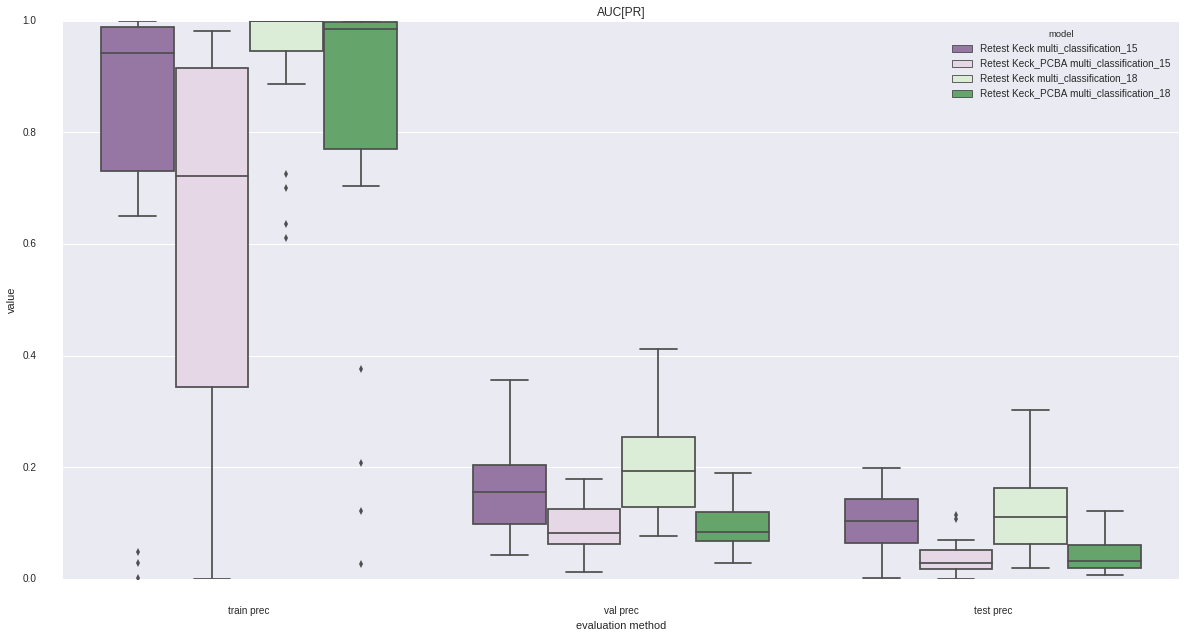

In [8]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                      model_list=model_list[indices],
                      title='AUC[PR]')

In [9]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                                                                   model_list=model_list[indices],
                                                                   evaluation_mode='AUC[PR]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.777 | 0.161 | 0.101 |
| Retest Keck_PCBA multi_classification_15 | 0.605 | 0.089 | 0.038 |
| Retest Keck multi_classification_18 | 0.925 | 0.200 | 0.122 |
| Retest Keck_PCBA multi_classification_18 | 0.794 | 0.096 | 0.044 |

## Model comparison
### median of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.942 | 0.155 | 0.103 |
| Retest Keck_PCBA multi_classification_15 | 0.722 | 0.082 | 0.027 |
| Retest Keck multi_classification_18 | 1.000 | 0.192 | 0.110 |
| Retest Keck_PCBA multi_classification_18 | 0.985 | 0.083 | 0.031 |

## Model comparison
### std of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.342 | 0.081 | 0.058 |
| Retest Keck_PCBA multi_classification_15 | 0.354 | 0.049 | 0.032 |
| Retest Keck multi_classification_18 | 0.136 | 0.086 | 0.079 |
| Retest Keck_PCBA multi_classification_18 | 0.329 | 0.045 | 0.036 |


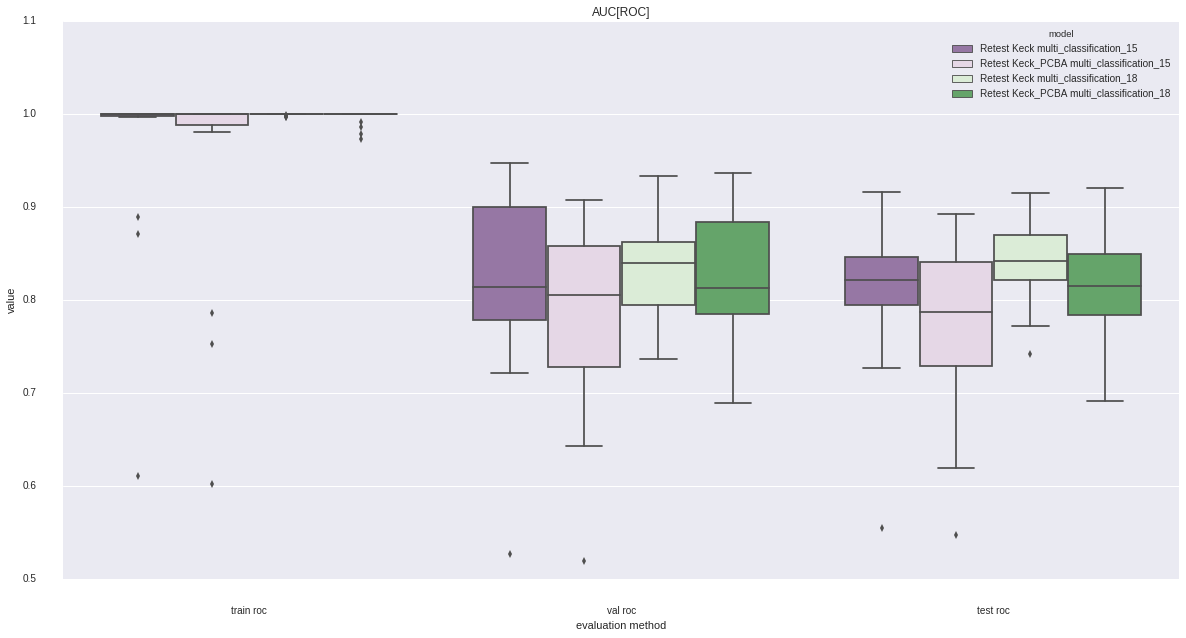

In [10]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                      model_list=model_list[indices],
                      title='AUC[ROC]')

In [11]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                                                                   model_list=model_list[indices],
                                                                   evaluation_mode='AUC[ROC]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.968 | 0.825 | 0.812 |
| Retest Keck_PCBA multi_classification_15 | 0.954 | 0.786 | 0.775 |
| Retest Keck multi_classification_18 | 0.999 | 0.834 | 0.843 |
| Retest Keck_PCBA multi_classification_18 | 0.996 | 0.825 | 0.816 |

## Model comparison
### median of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 1.000 | 0.814 | 0.821 |
| Retest Keck_PCBA multi_classification_15 | 0.999 | 0.806 | 0.787 |
| Retest Keck multi_classification_18 | 1.000 | 0.839 | 0.841 |
| Retest Keck_PCBA multi_classification_18 | 1.000 | 0.813 | 0.815 |

## Model comparison
### std of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.092 | 0.100 | 0.078 |
| Retest Keck_PCBA multi_classification_15 | 0.109 | 0.097 | 0.089 |
| Retest Keck multi_classification_18 | 0.001 | 0.055 | 0.045 |
| Retest Keck_PCBA multi_classification_18 | 0.008 | 0.070 | 0.054 |


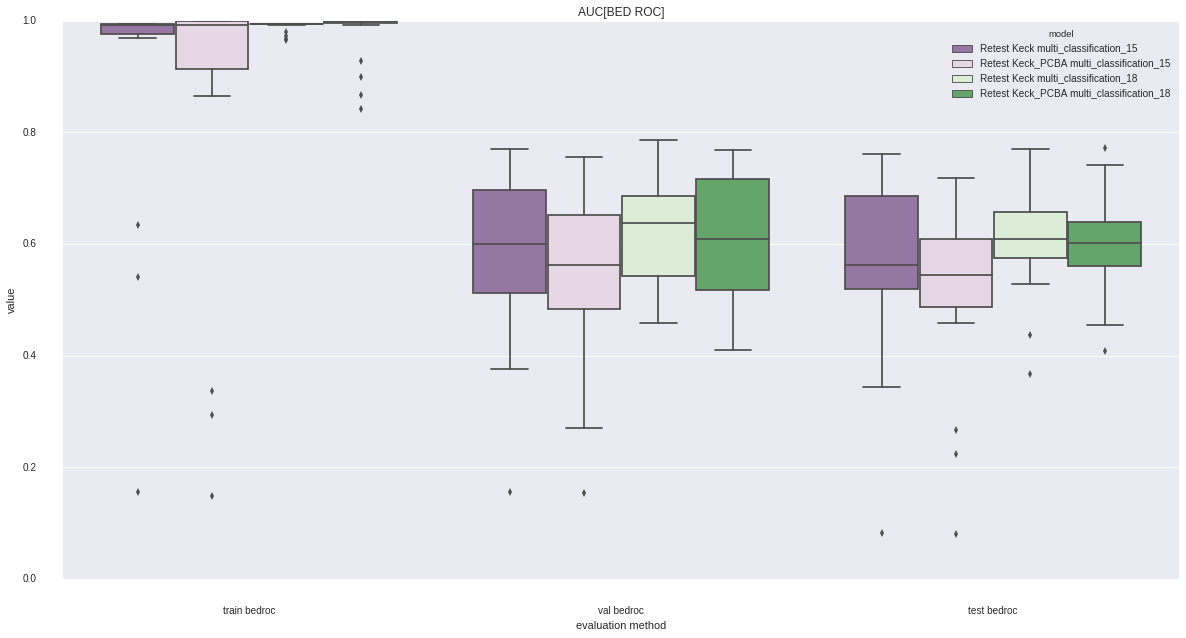

In [12]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                      model_list=model_list[indices],
                      title='AUC[BED ROC]')

In [13]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='AUC[BED ROC]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.908 | 0.579 | 0.556 |
| Retest Keck_PCBA multi_classification_15 | 0.867 | 0.540 | 0.518 |
| Retest Keck multi_classification_18 | 0.990 | 0.620 | 0.604 |
| Retest Keck_PCBA multi_classification_18 | 0.976 | 0.611 | 0.599 |

## Model comparison
### median of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.993 | 0.600 | 0.563 |
| Retest Keck_PCBA multi_classification_15 | 0.993 | 0.563 | 0.545 |
| Retest Keck multi_classification_18 | 0.995 | 0.637 | 0.609 |
| Retest Keck_PCBA multi_classification_18 | 0.999 | 0.610 | 0.602 |

## Model comparison
### std of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.217 | 0.149 | 0.159 |
| Retest Keck_PCBA multi_classification_15 | 0.267 | 0.154 | 0.166 |
| Retest Keck multi_classification_18 | 0.010 | 0.100 | 0.093 |
| Retest Keck_PCBA multi_classification_18 | 0.049 | 0.112 | 0.090 |


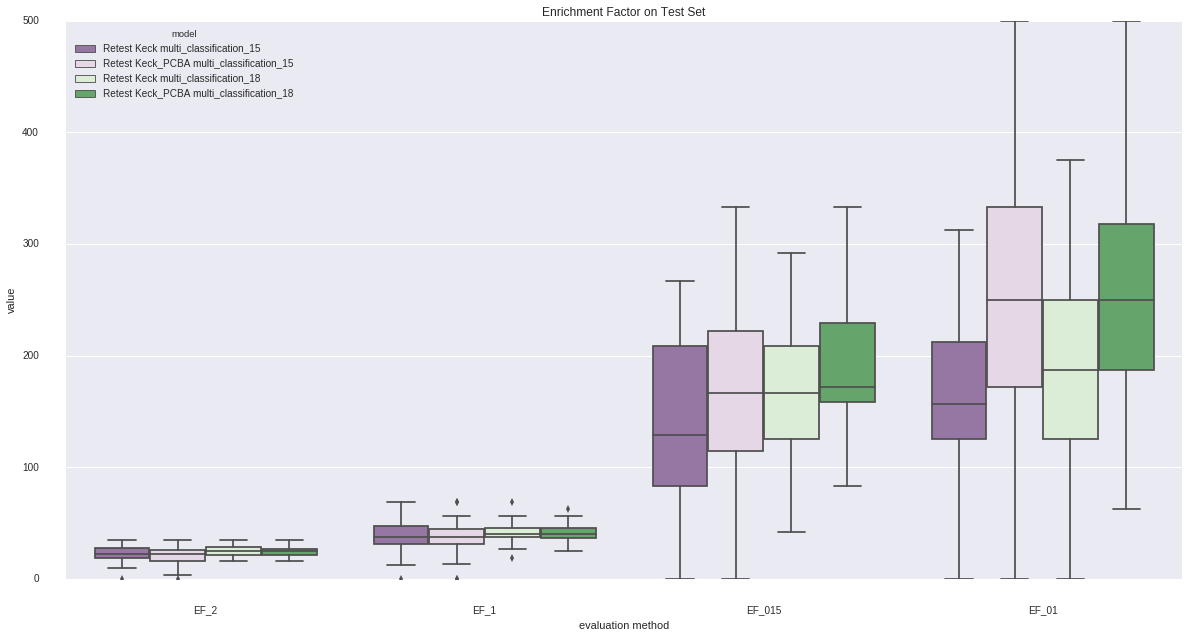

In [14]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                      model_list=model_list[indices],
                      title='Enrichment Factor on Test Set')

In [15]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                                                                   model_list=model_list[indices],
                                                                   evaluation_mode='Enrichment Factor (Test-set)')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 22.771 | 38.958 | 137.361 | 158.542 |
| Retest Keck_PCBA multi_classification_15 | 20.729 | 37.042 | 162.778 | 234.583 |
| Retest Keck multi_classification_18 | 24.500 | 41.396 | 154.306 | 190.625 |
| Retest Keck_PCBA multi_classification_18 | 24.375 | 41.417 | 187.639 | 256.458 |

## Model comparison
### median of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 22.604 | 37.500 | 129.167 | 156.250 |
| Retest Keck_PCBA multi_classification_15 | 21.875 | 37.500 | 166.667 | 250.000 |
| Retest Keck multi_classification_18 | 25.000 | 40.000 | 166.667 | 187.500 |
| Retest Keck_PCBA multi_classification_18 | 25.000 | 40.000 | 172.222 | 250.000 |

## Model comparison
### std of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 8.915 | 15.879 | 82.940 | 89.493 |
| Retest Keck_PCBA multi_classification_15 | 9.117 | 18.226 | 98.136 | 142.015 |
| Retest Keck multi_classification_18 | 5.460 | 10.798 | 71.405 | 97.332 |
| Retest Keck_PCBA multi_classification_18 | 4.909 | 9.626 | 65.179 | 115.908 |


# Eval on Keck_Pria_FP

In [16]:
indices = [4, 5, 6, 7]

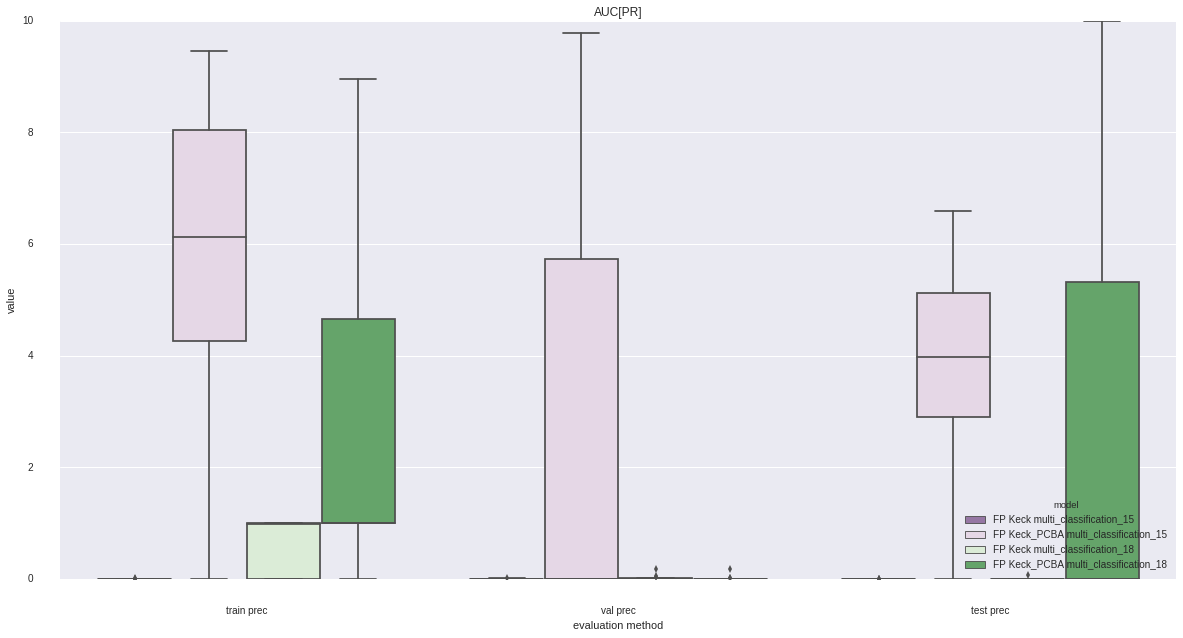

In [17]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                      model_list=model_list[indices],
                      title='AUC[PR]')

In [18]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                                                                   model_list=model_list[indices],
                                                                   evaluation_mode='AUC[PR]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| FP Keck multi_classification_15 | 0.001 | 0.003 | 0.001 |
| FP Keck_PCBA multi_classification_15 | 5.634 | 2.426 | 3.629 |
| FP Keck multi_classification_18 | 0.549 | 0.016 | 0.004 |
| FP Keck_PCBA multi_classification_18 | 2.422 | 0.010 | 2.719 |

## Model comparison
### median of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| FP Keck multi_classification_15 | 0.001 | 0.001 | 0.000 |
| FP Keck_PCBA multi_classification_15 | 6.118 | 0.000 | 3.983 |
| FP Keck multi_classification_18 | 0.988 | 0.003 | 0.001 |
| FP Keck_PCBA multi_classification_18 | 0.998 | 0.001 | 0.001 |

## Model comparison
### std of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| FP Keck multi_classification_15 | 0.003 | 0.004 | 0.001 |
| FP Keck_PCBA multi_classification_15 | 2.945 | 3.908 | 2.156 |
| FP Keck multi_classification_18 | 0.509 | 0.038 | 0.014 |
| FP Keck_PCBA multi_classification_18 | 2.767 | 0.037 | 3.694 |


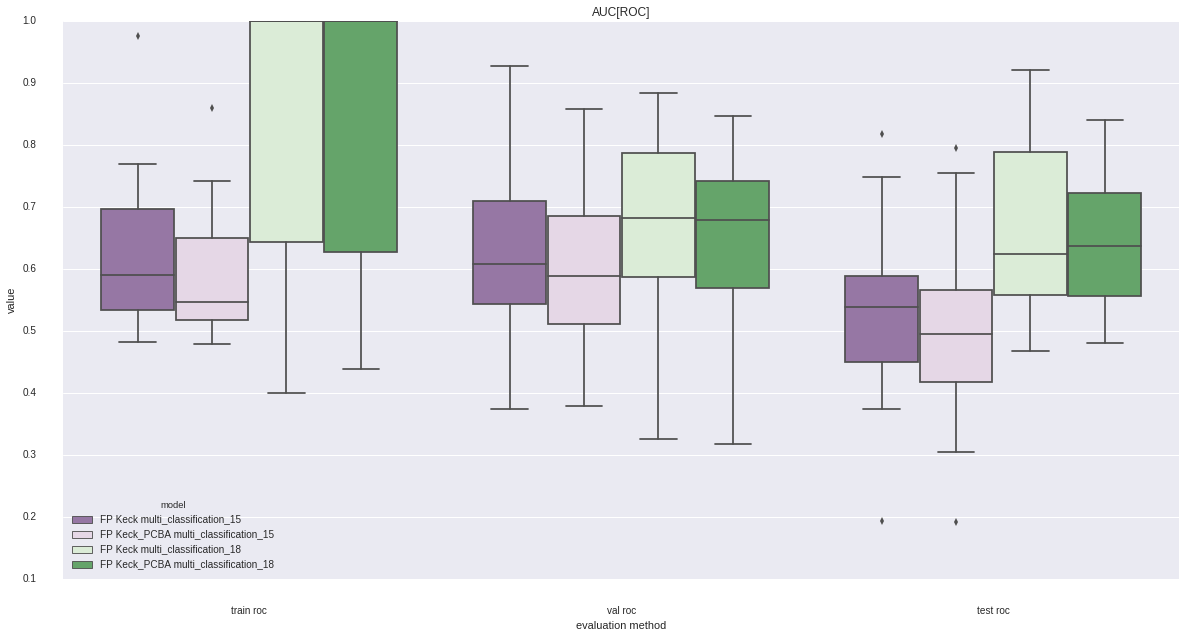

In [19]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                      model_list=model_list[indices],
                      title='AUC[ROC]')

In [20]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                                                                   model_list=model_list[indices],
                                                                   evaluation_mode='AUC[ROC]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| FP Keck multi_classification_15 | 0.620 | 0.632 | 0.535 |
| FP Keck_PCBA multi_classification_15 | 0.588 | 0.609 | 0.499 |
| FP Keck multi_classification_18 | 0.828 | 0.670 | 0.662 |
| FP Keck_PCBA multi_classification_18 | 0.822 | 0.658 | 0.649 |

## Model comparison
### median of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| FP Keck multi_classification_15 | 0.590 | 0.608 | 0.538 |
| FP Keck_PCBA multi_classification_15 | 0.547 | 0.588 | 0.495 |
| FP Keck multi_classification_18 | 1.000 | 0.682 | 0.624 |
| FP Keck_PCBA multi_classification_18 | 1.000 | 0.679 | 0.637 |

## Model comparison
### std of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| FP Keck multi_classification_15 | 0.120 | 0.135 | 0.140 |
| FP Keck_PCBA multi_classification_15 | 0.101 | 0.132 | 0.149 |
| FP Keck multi_classification_18 | 0.207 | 0.144 | 0.148 |
| FP Keck_PCBA multi_classification_18 | 0.210 | 0.135 | 0.111 |


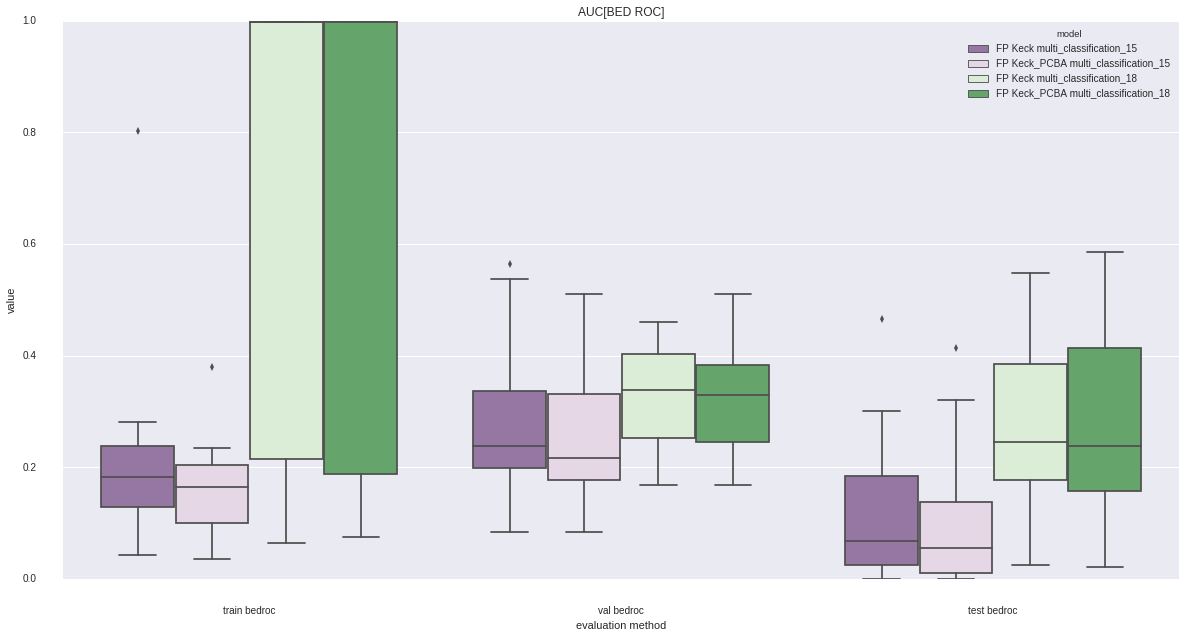

In [21]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                      model_list=model_list[indices],
                      title='AUC[BED ROC]')

In [22]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='AUC[BED ROC]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.207 | 0.280 | 0.120 |
| Retest Keck_PCBA multi_classification_15 | 0.160 | 0.257 | 0.105 |
| Retest Keck multi_classification_18 | 0.635 | 0.326 | 0.272 |
| Retest Keck_PCBA multi_classification_18 | 0.626 | 0.328 | 0.276 |

## Model comparison
### median of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.183 | 0.238 | 0.068 |
| Retest Keck_PCBA multi_classification_15 | 0.165 | 0.217 | 0.056 |
| Retest Keck multi_classification_18 | 0.998 | 0.339 | 0.246 |
| Retest Keck_PCBA multi_classification_18 | 0.998 | 0.329 | 0.239 |

## Model comparison
### std of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.157 | 0.126 | 0.129 |
| Retest Keck_PCBA multi_classification_15 | 0.078 | 0.109 | 0.125 |
| Retest Keck multi_classification_18 | 0.415 | 0.093 | 0.161 |
| Retest Keck_PCBA multi_classification_18 | 0.425 | 0.104 | 0.172 |


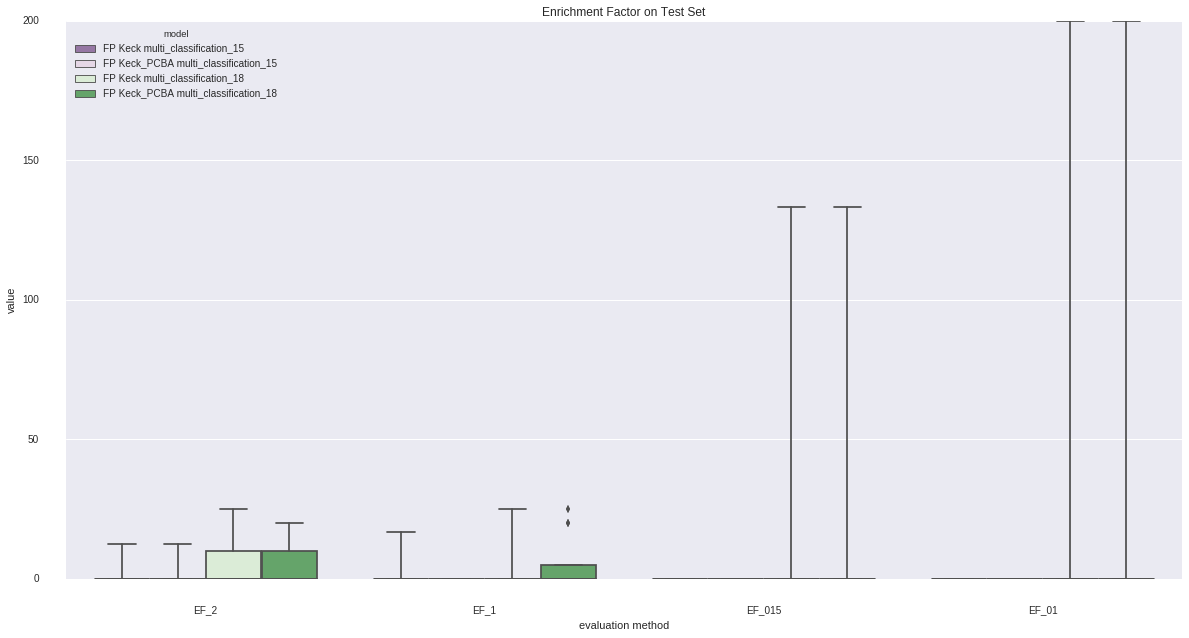

In [23]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                      model_list=model_list[indices],
                      title='Enrichment Factor on Test Set')

In [24]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                                                                   model_list=model_list[indices],
                                                                   evaluation_mode='Enrichment Factor (Test-set)')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| FP Keck multi_classification_15 | 1.042 | 0.833 | 0.000 | 0.000 |
| FP Keck_PCBA multi_classification_15 | 1.042 | 0.000 | 0.000 | 0.000 |
| FP Keck multi_classification_18 | 5.458 | 4.500 | 6.667 | 10.000 |
| FP Keck_PCBA multi_classification_18 | 5.208 | 5.500 | 6.667 | 10.000 |

## Model comparison
### median of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| FP Keck multi_classification_15 | 0.000 | 0.000 | 0.000 | 0.000 |
| FP Keck_PCBA multi_classification_15 | 0.000 | 0.000 | 0.000 | 0.000 |
| FP Keck multi_classification_18 | 0.000 | 0.000 | 0.000 | 0.000 |
| FP Keck_PCBA multi_classification_18 | 0.000 | 0.000 | 0.000 | 0.000 |

## Model comparison
### std of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| FP Keck multi_classification_15 | 3.277 | 3.727 | 0.000 | 0.000 |
| FP Keck_PCBA multi_classification_15 | 3.277 | 0.000 | 0.000 | 0.000 |
| FP Keck multi_classification_18 | 7.022 | 9.305 | 29.814 | 44.721 |
| FP Keck_PCBA multi_classification_18 | 6.346 | 9.854 | 29.814 | 44.721 |


# Eval on Keck_RMI

In [25]:
indices = [8, 9, 10, 11]

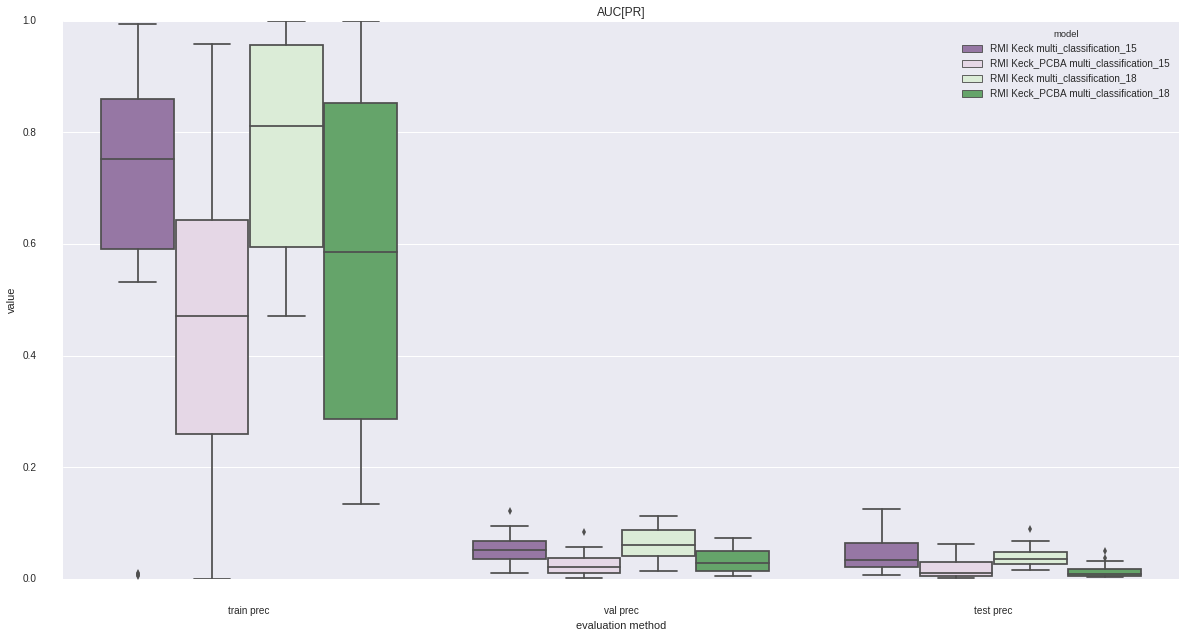

In [26]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                      model_list=model_list[indices],
                      title='AUC[PR]')

In [27]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                                                                   model_list=model_list[indices],
                                                                   evaluation_mode='AUC[PR]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| RMI Keck multi_classification_15 | 0.640 | 0.054 | 0.044 |
| RMI Keck_PCBA multi_classification_15 | 0.463 | 0.026 | 0.018 |
| RMI Keck multi_classification_18 | 0.774 | 0.062 | 0.041 |
| RMI Keck_PCBA multi_classification_18 | 0.572 | 0.032 | 0.014 |

## Model comparison
### median of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| RMI Keck multi_classification_15 | 0.752 | 0.051 | 0.034 |
| RMI Keck_PCBA multi_classification_15 | 0.472 | 0.021 | 0.010 |
| RMI Keck multi_classification_18 | 0.812 | 0.061 | 0.035 |
| RMI Keck_PCBA multi_classification_18 | 0.586 | 0.028 | 0.009 |

## Model comparison
### std of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| RMI Keck multi_classification_15 | 0.347 | 0.028 | 0.032 |
| RMI Keck_PCBA multi_classification_15 | 0.315 | 0.022 | 0.018 |
| RMI Keck multi_classification_18 | 0.193 | 0.029 | 0.019 |
| RMI Keck_PCBA multi_classification_18 | 0.312 | 0.021 | 0.013 |


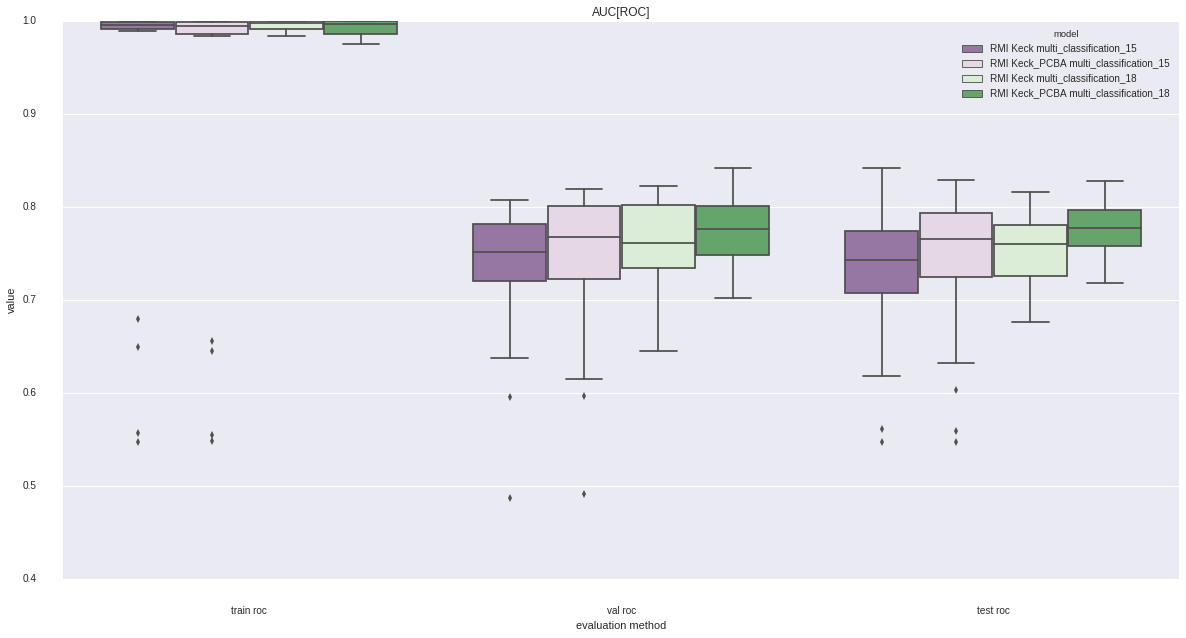

In [28]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                      model_list=model_list[indices],
                      title='AUC[ROC]')

In [29]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                                                                   model_list=model_list[indices],
                                                                   evaluation_mode='AUC[ROC]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| RMI Keck multi_classification_15 | 0.919 | 0.730 | 0.726 |
| RMI Keck_PCBA multi_classification_15 | 0.916 | 0.741 | 0.739 |
| RMI Keck multi_classification_18 | 0.995 | 0.755 | 0.753 |
| RMI Keck_PCBA multi_classification_18 | 0.993 | 0.773 | 0.775 |

## Model comparison
### median of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| RMI Keck multi_classification_15 | 0.996 | 0.752 | 0.743 |
| RMI Keck_PCBA multi_classification_15 | 0.994 | 0.767 | 0.765 |
| RMI Keck multi_classification_18 | 0.998 | 0.761 | 0.760 |
| RMI Keck_PCBA multi_classification_18 | 0.997 | 0.776 | 0.777 |

## Model comparison
### std of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| RMI Keck multi_classification_15 | 0.161 | 0.078 | 0.080 |
| RMI Keck_PCBA multi_classification_15 | 0.163 | 0.086 | 0.086 |
| RMI Keck multi_classification_18 | 0.005 | 0.052 | 0.044 |
| RMI Keck_PCBA multi_classification_18 | 0.009 | 0.040 | 0.027 |


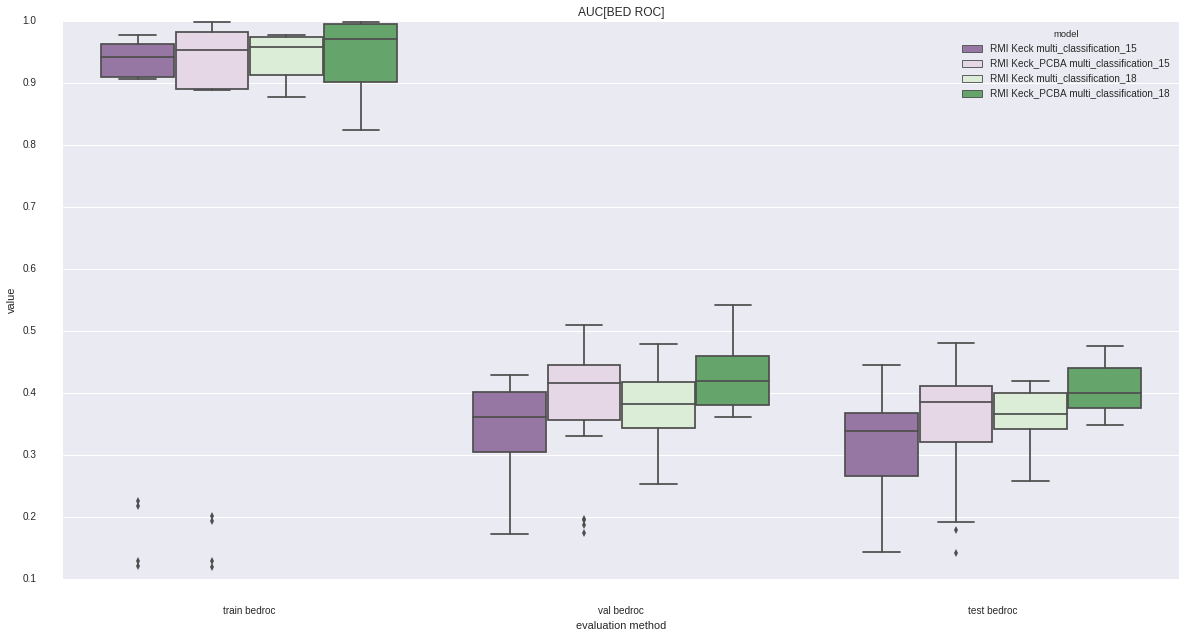

In [30]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                      model_list=model_list[indices],
                      title='AUC[BED ROC]')

In [31]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='AUC[BED ROC]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.795 | 0.339 | 0.318 |
| Retest Keck_PCBA multi_classification_15 | 0.801 | 0.375 | 0.355 |
| Retest Keck multi_classification_18 | 0.944 | 0.378 | 0.358 |
| Retest Keck_PCBA multi_classification_18 | 0.944 | 0.428 | 0.410 |

## Model comparison
### median of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.942 | 0.361 | 0.338 |
| Retest Keck_PCBA multi_classification_15 | 0.952 | 0.416 | 0.384 |
| Retest Keck multi_classification_18 | 0.958 | 0.382 | 0.365 |
| Retest Keck_PCBA multi_classification_18 | 0.971 | 0.420 | 0.399 |

## Model comparison
### std of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| Retest Keck multi_classification_15 | 0.320 | 0.081 | 0.082 |
| Retest Keck_PCBA multi_classification_15 | 0.330 | 0.104 | 0.100 |
| Retest Keck multi_classification_18 | 0.034 | 0.062 | 0.046 |
| Retest Keck_PCBA multi_classification_18 | 0.060 | 0.057 | 0.041 |


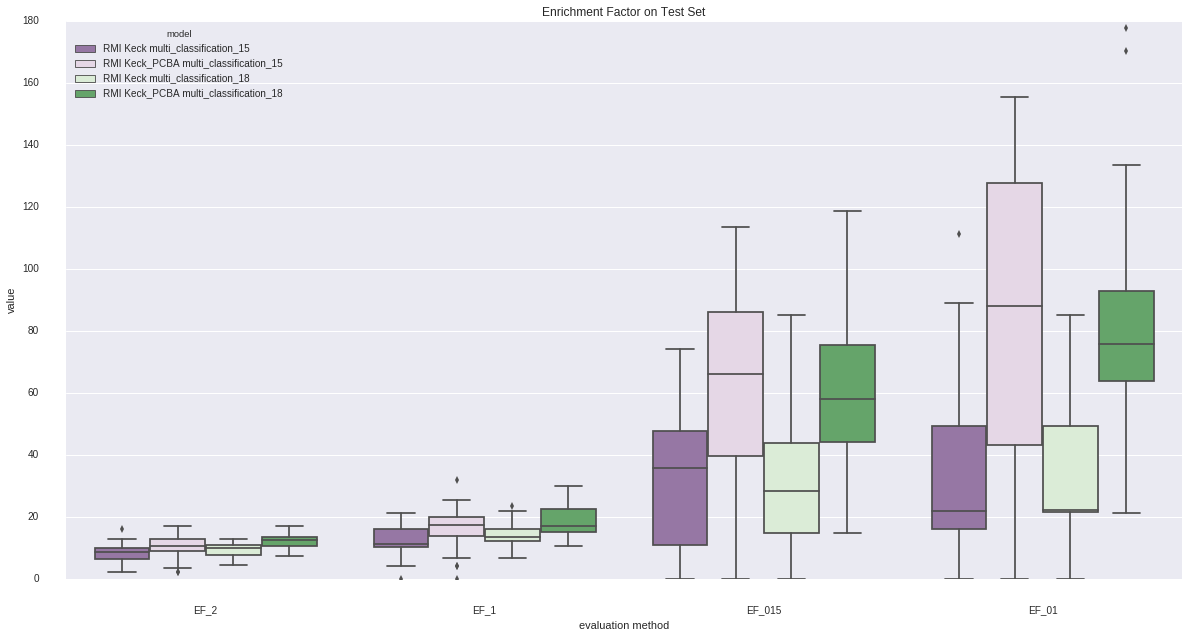

In [32]:
plot_cross_validation(whole_paths[indices],
                      evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                      model_list=model_list[indices],
                      title='Enrichment Factor on Test Set')

In [33]:
mean_content, median_content, std_content = table_cross_validation(whole_paths[indices],
                                                                   evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                                                                   model_list=model_list[indices],
                                                                   evaluation_mode='Enrichment Factor (Test-set)')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| RMI Keck multi_classification_15 | 8.250 | 12.486 | 31.913 | 34.916 |
| RMI Keck_PCBA multi_classification_15 | 9.984 | 16.173 | 60.168 | 79.403 |
| RMI Keck multi_classification_18 | 9.343 | 14.117 | 33.189 | 34.656 |
| RMI Keck_PCBA multi_classification_18 | 12.332 | 18.459 | 62.296 | 82.570 |

## Model comparison
### median of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| RMI Keck multi_classification_15 | 8.696 | 11.111 | 35.769 | 21.981 |
| RMI Keck_PCBA multi_classification_15 | 10.556 | 17.391 | 66.023 | 87.923 |
| RMI Keck multi_classification_18 | 10.000 | 13.333 | 28.369 | 22.222 |
| RMI Keck_PCBA multi_classification_18 | 12.494 | 17.021 | 57.971 | 75.887 |

## Model comparison
### std of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| RMI Keck multi_classification_15 | 3.421 | 5.932 | 23.927 | 31.495 |
| RMI Keck_PCBA multi_classification_15 | 4.447 | 7.836 | 37.591 | 51.956 |
| RMI Keck multi_classification_18 | 2.417 | 4.619 | 23.307 | 24.595 |
| RMI Keck_PCBA multi_classification_18 | 2.640 | 5.154 | 27.438 | 43.865 |
